# Данный файл содержит алгоритм предобработки Redmi DataFrame

## Первичная очистка и объединение

In [3]:
import pandas as pd
import re
import numpy as np

In [11]:
df_items = pd.read_csv('https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Data%20Tables/Redmi/Redmi%20Sales.tsv', delimiter = "\t")
df_items.head()

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Last_Sale
0,Wall Outlet To Triple USB Power Adapter - Wall...,$9.99,$12.91,940,"$9,388.60",https://www.ebay.com/itm/363346871915?nordt=tr...,"May 11, 2023"
1,Xiaomi Redmi Note 11 128GB 4GB RAM GSM Unlocke...,$187.39,$7.10,772,"$144,668.87",https://www.ebay.com/itm/325013923406?nordt=tr...,"May 14, 2023"
2,Xiaomi Redmi Note 10 Pro 128GB 6GB RAM GSM FAC...,$282.12,$12.05,455,"$128,364.84",https://www.ebay.com/itm/324648557855?nordt=tr...,"May 5, 2023"
3,Xiaomi Redmi Note 11 Pro+ 5G Plus 256GB 8GB RA...,$395.19,$12.25,408,"$161,235.53",https://www.ebay.com/itm/203898287868?nordt=tr...,"May 10, 2023"
4,Xiaomi Redmi Note 10 *5G* 128GB 4GB RAM GSM Un...,$195.45,$8.60,428,"$83,654.10",https://www.ebay.com/itm/324618206904?nordt=tr...,"Jan 18, 2023"


In [12]:
df_items.dropna(subset=['Link'], inplace=True)
df_items.reset_index(inplace=True)
df_items.drop('index', axis=1, inplace = True)
df_items.isna().sum()

Title            0
Price            0
Shipping_cost    0
Sales_Count      0
Sales_Value      0
Link             0
Last_Sale        0
dtype: int64

In [13]:
df_items.head()

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Last_Sale
0,Wall Outlet To Triple USB Power Adapter - Wall...,$9.99,$12.91,940,"$9,388.60",https://www.ebay.com/itm/363346871915?nordt=tr...,"May 11, 2023"
1,Xiaomi Redmi Note 11 128GB 4GB RAM GSM Unlocke...,$187.39,$7.10,772,"$144,668.87",https://www.ebay.com/itm/325013923406?nordt=tr...,"May 14, 2023"
2,Xiaomi Redmi Note 10 Pro 128GB 6GB RAM GSM FAC...,$282.12,$12.05,455,"$128,364.84",https://www.ebay.com/itm/324648557855?nordt=tr...,"May 5, 2023"
3,Xiaomi Redmi Note 11 Pro+ 5G Plus 256GB 8GB RA...,$395.19,$12.25,408,"$161,235.53",https://www.ebay.com/itm/203898287868?nordt=tr...,"May 10, 2023"
4,Xiaomi Redmi Note 10 *5G* 128GB 4GB RAM GSM Un...,$195.45,$8.60,428,"$83,654.10",https://www.ebay.com/itm/324618206904?nordt=tr...,"Jan 18, 2023"


In [14]:
def Sales_Value(value):
  pattern = r'\$|,'
  clean_value = re.sub(pattern, '', value)
  numeric_value = float(clean_value)
  return numeric_value


df_items.Price = df_items.Price.apply(lambda x: float(re.sub(r'[^\d.]', '', x)))
df_items.Shipping_cost = df_items.Shipping_cost.apply(lambda x: float(re.sub(r'[^\d.]', '', x)))
df_items.Sales_Value = df_items.Sales_Value.apply(lambda x: Sales_Value(x))

In [15]:
df_items.head()

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Last_Sale
0,Wall Outlet To Triple USB Power Adapter - Wall...,9.99,12.91,940,9388.60,https://www.ebay.com/itm/363346871915?nordt=tr...,"May 11, 2023"
1,Xiaomi Redmi Note 11 128GB 4GB RAM GSM Unlocke...,187.39,7.10,772,144668.87,https://www.ebay.com/itm/325013923406?nordt=tr...,"May 14, 2023"
2,Xiaomi Redmi Note 10 Pro 128GB 6GB RAM GSM FAC...,282.12,12.05,455,128364.84,https://www.ebay.com/itm/324648557855?nordt=tr...,"May 5, 2023"
3,Xiaomi Redmi Note 11 Pro+ 5G Plus 256GB 8GB RA...,395.19,12.25,408,161235.53,https://www.ebay.com/itm/203898287868?nordt=tr...,"May 10, 2023"
4,Xiaomi Redmi Note 10 *5G* 128GB 4GB RAM GSM Un...,195.45,8.60,428,83654.10,https://www.ebay.com/itm/324618206904?nordt=tr...,"Jan 18, 2023"


In [17]:
brands_list = ['Apple', 'Samsung', 'Huawei', 'Xiaomi', 'Oppo', 'OnePlus', 'Google', 'Motorola', 'Sony', 'LG', 'HTC', 'Nokia', 'BlackBerry', 'Lenovo', 'Asus', 'ZTE', 'Alcatel', 'Vivo', 'Realme', 'Honor']
brands_regex = re.compile('('+ '|'.join(brands_list) + ')', flags=re.IGNORECASE)

df_items['brand'] = df_items['Title'].str.extract(brands_regex)
df_items['brand'] = df_items['brand'].apply(lambda x: x.lower() if type(x) == str else x)
df_items.head()

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Last_Sale,brand
0,Wall Outlet To Triple USB Power Adapter - Wall...,9.99,12.91,940,9388.60,https://www.ebay.com/itm/363346871915?nordt=tr...,"May 11, 2023",NaN
1,Xiaomi Redmi Note 11 128GB 4GB RAM GSM Unlocke...,187.39,7.10,772,144668.87,https://www.ebay.com/itm/325013923406?nordt=tr...,"May 14, 2023",xiaomi
2,Xiaomi Redmi Note 10 Pro 128GB 6GB RAM GSM FAC...,282.12,12.05,455,128364.84,https://www.ebay.com/itm/324648557855?nordt=tr...,"May 5, 2023",xiaomi
3,Xiaomi Redmi Note 11 Pro+ 5G Plus 256GB 8GB RA...,395.19,12.25,408,161235.53,https://www.ebay.com/itm/203898287868?nordt=tr...,"May 10, 2023",xiaomi
4,Xiaomi Redmi Note 10 *5G* 128GB 4GB RAM GSM Un...,195.45,8.60,428,83654.10,https://www.ebay.com/itm/324618206904?nordt=tr...,"Jan 18, 2023",xiaomi


In [18]:
characteristics_df = pd.read_csv("https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Data%20Tables/Redmi/Redmi%20Characteristics.tsv", delimiter = "\t")

In [24]:
cols = list(characteristics_df.count()[(characteristics_df.count()>(len(characteristics_df)*0.2))].index)
cols

['Link',
 'Condition',
 'MPN',
 'Model Number',
 'Brand',
 'Model',
 'Style',
 'Connectivity',
 'Country/Region of Manufacture',
 'Processor',
 'Screen Size',
 'Lock Status',
 'SIM Card Slot',
 'Network',
 'Operating System',
 'Features',
 'Storage Capacity',
 'Contract',
 'RAM',
 'Memory Card Type',
 'Camera Resolution',
 'Color',
 'Chipset Model',
 'Manufacturer Warranty',
 'Seller Notes']

In [25]:
characteristics_df = characteristics_df[cols]

In [26]:
characteristics_df.isna().sum().sort_values()

Link                               0
Condition                          0
Brand                              3
Model                             93
Operating System                 141
Storage Capacity                 151
Lock Status                      162
SIM Card Slot                    171
Screen Size                      179
Camera Resolution                198
Processor                        201
Network                          209
Contract                         239
Connectivity                     246
RAM                              271
Features                         359
Memory Card Type                 415
MPN                              425
Color                            438
Style                            497
Model Number                     590
Country/Region of Manufacture    642
Chipset Model                    676
Seller Notes                     686
Manufacturer Warranty            711
dtype: int64

In [27]:
merged_df = df_items.merge(characteristics_df, on='Link', how='inner')

In [28]:
merged_df["Brand"][merged_df["Brand"].isna()] = merged_df["brand"].apply(lambda x: x.title() if type(x)==str else x)

C:\Users\druny\AppData\Local\Temp\ipykernel_16392\2412579994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Brand"][merged_df["Brand"].isna()] = merged_df["brand"].apply(lambda x: x.title() if type(x)==str else x)


In [29]:
(~merged_df.isna()).sum()

Title                            894
Price                            894
Shipping_cost                    894
Sales_Count                      894
Sales_Value                      894
Link                             894
Last_Sale                        894
brand                            834
Condition                        894
MPN                              469
Model Number                     304
Brand                            894
Model                            799
Style                            397
Connectivity                     648
Country/Region of Manufacture    252
Processor                        693
Screen Size                      715
Lock Status                      732
SIM Card Slot                    723
Network                          685
Operating System                 753
Features                         535
Storage Capacity                 741
Contract                         655
RAM                              621
Memory Card Type                 477
C

In [31]:
merged_df.iloc[100]

Title                            Xiaomi Redmi Note 10 Pro 256GB 8GB RAM (FACTOR...
Price                                                                       269.37
Shipping_cost                                                                34.99
Sales_Count                                                                     24
Sales_Value                                                                6464.76
Link                             https://www.ebay.com/itm/195460458451?nordt=tr...
Last_Sale                                                              May 7, 2023
brand                                                                       xiaomi
Condition                        New: A brand-new, unused, unopened, undamaged ...
MPN                                                                            NaN
Model Number                                                              M2101K6G
Brand                                                                       Xiaomi
Mode

In [32]:
merged_df.drop('brand', axis=1, inplace = True)

In [33]:
merged_df.to_csv("Redmi Merged.tsv", sep="\t")

In [34]:
merged_df.shape

(894, 31)

## Вторичная предобработка полученных с eBay данных

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Preprocessing/Redmi/Redmi%20Merged.tsv', delimiter = '\t')

In [36]:
df.head()

,Unnamed: 0,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Last_Sale,Condition,MPN,...,Features,Storage Capacity,Contract,RAM,Memory Card Type,Camera Resolution,Color,Chipset Model,Manufacturer Warranty,Seller Notes
0,0,Wall Outlet To Triple USB Power Adapter - Wall...,9.99,12.91,940,9388.60,https://www.ebay.com/itm/363346871915?nordt=tr...,"May 11, 2023","New: A brand-new, unused, unopened, undamaged ...",dual-slot-pc-plug-in-mobile-cell-phone-replace...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Xiaomi Redmi Note 11 128GB 4GB RAM GSM Unlocke...,187.39,7.10,772,144668.87,https://www.ebay.com/itm/325013923406?nordt=tr...,"May 14, 2023","New: A brand-new, unused, unopened, undamaged ...",NaN,...,Bluetooth Enabled,128 GB,Without Contract,4 GB,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Xiaomi Redmi Note 10 Pro 128GB 6GB RAM GSM FAC...,282.12,12.05,455,128364.84,https://www.ebay.com/itm/324648557855?nordt=tr...,"May 5, 2023","New: A brand-new, unused, unopened, undamaged ...",Note 10 pro,...,"Bluetooth Enabled, Camera",128 GB,Without Contract,6 GB,MicroSD,108.0 MP,NaN,NaN,NaN,NaN
3,3,Xiaomi Redmi Note 11 Pro+ 5G Plus 256GB 8GB RA...,395.19,12.25,408,161235.53,https://www.ebay.com/itm/203898287868?nordt=tr...,"May 10, 2023","New: A brand-new, unused, unopened, undamaged ...",NaN,...,NaN,256 GB,Without Contract,8 GB,NaN,108.0 MP,NaN,NaN,NaN,NaN
4,4,Xiaomi Redmi Note 10 *5G* 128GB 4GB RAM GSM Un...,195.45,8.60,428,83654.10,https://www.ebay.com/itm/324618206904?nordt=tr...,"Jan 18, 2023","New: A brand-new, unused, unopened, undamaged ...",NaN,...,"Bluetooth Enabled, Camera",128 GB,Without Contract,4 GB,microSDXC,48.0 MP,NaN,NaN,NaN,NaN


In [37]:
df.columns

Index(['Unnamed: 0', 'Title', 'Price', 'Shipping_cost', 'Sales_Count',
       'Sales_Value', 'Link', 'Last_Sale', 'Condition', 'MPN', 'Model Number',
       'Brand', 'Model', 'Style', 'Connectivity',
       'Country/Region of Manufacture', 'Processor', 'Screen Size',
       'Lock Status', 'SIM Card Slot', 'Network', 'Operating System',
       'Features', 'Storage Capacity', 'Contract', 'RAM', 'Memory Card Type',
       'Camera Resolution', 'Color', 'Chipset Model', 'Manufacturer Warranty',
       'Seller Notes'],
      dtype='object')

In [38]:
df.drop(columns = 'Unnamed: 0', inplace = True)

<Axes: >

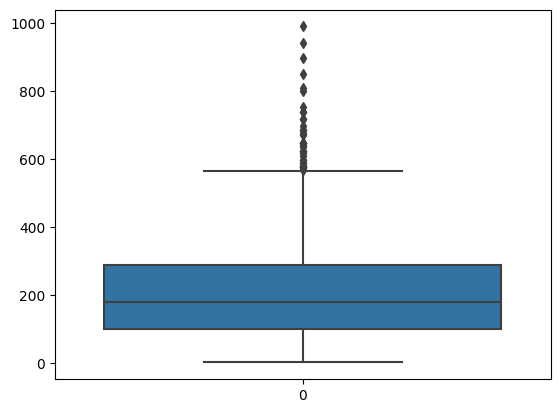

In [39]:
import seaborn as sns
sns.boxplot(df.Price)

## Ищем и убираем мусор.

In [40]:
import numpy as np
df[df.Price > np.quantile(df.Price, 0.99)]

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Last_Sale,Condition,MPN,Model Number,...,Features,Storage Capacity,Contract,RAM,Memory Card Type,Camera Resolution,Color,Chipset Model,Manufacturer Warranty,Seller Notes
299,Xiaomi Redmi K60 Pro 5G Smartphone Android 13 ...,737.24,0.00,4,2948.96,https://www.ebay.com/itm/165860998047?nordt=tr...,"Mar 29, 2023","New: A brand-new, unused, unopened, undamaged ...",Does Not Apply,NaN,...,"4K Video Recording, Bluetooth Enabled, Camera,...",NaN,Without Contract,NaN,No Applicable,54 MP,NaN,Qualcomm Snapdragon 8 Gen 2,1 year,NaN
330,Xiaomi Redmi Note 12 Turbo Redmi Harry Potter ...,737.50,0.00,4,2950.00,https://www.ebay.com/itm/394589146641?nordt=tr...,"May 11, 2023","New: A brand-new, unused, unopened, undamaged ...",Tt684567,NaN,...,Accelerometer,12GB+256GB,Without Contract,12 GB,MicroSD,64.0 MP,Harry Potter Edition,Info,1 Month,NaN
370,New Xiaomi Redmi K60 Pro Smartphone MIUI 14 Sn...,751.66,0.00,3,2254.97,https://www.ebay.com/itm/285093557882?nordt=tr...,"May 6, 2023","New: A brand-new, unused, unopened, undamaged ...",Does Not Apply,Redmi K60 Pro,...,"4K Video Recording, Bluetooth Enabled, Camera,...",NaN,Without Contract,NaN,No Applicable,54 MP,NaN,Qualcomm Snapdragon 8 Gen 2,1 year,NaN
383,Redmi K50 Gaming Mercedes AMG F1 Edition 5G 6....,989.91,42.00,3,2969.74,https://www.ebay.com/itm/334340689478?nordt=tr...,"May 7, 2022","New: A brand-new, unused, unopened, undamaged ...",Does Not Apply,NaN,...,"OLED, 1B colors, 120Hz, HDR10+, 4K Video Recor...",256 GB,Without Contract,12 GB,No Applicable,64.0 MP,NaN,NaN,NaN,NaN
454,Xiaomi Redmi K40 Pro+ Snapdragon 888 5G AMOLED...,810.00,23.99,2,1620.00,https://www.ebay.com/itm/274819854632?nordt=tr...,"Jul 29, 2021","New: A brand-new, unused, unopened, undamaged ...",NaN,NaN,...,"3D Depth Camera, 4K Video Recording, Accelerom...",256 GB,Without Contract,12 GB,NaN,108.0 MP,Aurora,NaN,NaN,NaN
656,"Xiaomi Redmi Note 11T Pro+ 5G 6.6"" 8/256GB Ast...",850.89,42.00,1,850.89,https://www.ebay.com/itm/175297461151?nordt=tr...,"Aug 20, 2022","New: A brand-new, unused, unopened, undamaged ...",Does Not Apply,NaN,...,"IPS LCD, 144Hz, HDR10, Dolby Vision, 650 nits",256 GB,NaN,8GB,NaN,64.0 Megapixel,Silver,NaN,NaN,NaN
677,Xiaomi Redmi Note 12 Turbo Harry Potter Editio...,799.87,0.00,1,799.87,https://www.ebay.com/itm/175671147951?nordt=tr...,"May 14, 2023","New: A brand-new, unused, unopened, undamaged ...",Does Not Apply,NaN,...,"OLED, 1B colors, 120Hz, Dolby Vision, HDR10+, ...",256GB,NaN,12 GB,NaN,64.0 MP,NaN,NaN,NaN,NaN
752,Xiaomi Redmi K60 Pro 5G Smartphone MIUI 14 Sna...,897.99,0.00,1,897.99,https://www.ebay.com/itm/204201393431?nordt=tr...,"Feb 22, 2023","New: A brand-new, unused, unopened, undamaged ...",Does Not Apply,NaN,...,"4K Video Recording, Bluetooth Enabled, Camera,...",NaN,Without Contract,NaN,No Applicable,54 MP,NaN,Qualcomm Snapdragon 8 Gen 2,1 year,NaN
763,"Xiaomi Redmi K50 Ultra 6.67""OLED 12/512GB Snap...",940.47,0.00,1,940.47,https://www.ebay.com/itm/225125528863?nordt=tr...,"Sep 13, 2022","New: A brand-new, unused, unopened, undamaged ...",Does Not Apply,NaN,...,4K Video Recording,512 GB,Without Contract,12 GB,Not Applicable,108.0 MP,NaN,NaN,NaN,NaN


In [41]:
df[df.Price < np.quantile(df.Price, 0.01)]

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Last_Sale,Condition,MPN,Model Number,...,Features,Storage Capacity,Contract,RAM,Memory Card Type,Camera Resolution,Color,Chipset Model,Manufacturer Warranty,Seller Notes
0,Wall Outlet To Triple USB Power Adapter - Wall...,9.99,12.91,940,9388.60,https://www.ebay.com/itm/363346871915?nordt=tr...,"May 11, 2023","New: A brand-new, unused, unopened, undamaged ...",dual-slot-pc-plug-in-mobile-cell-phone-replace...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,2-Pack for Xiaomi Redmi Note 9S / 9 Pro Privac...,14.32,0.00,13,186.11,https://www.ebay.com/itm/383911014382?nordt=tr...,"Mar 30, 2023","New: A brand-new, unused, unopened, undamaged ...",UezmG8h06v,NaN,...,NaN,Does Not Apply,NaN,NaN,NaN,NaN,Clear,NaN,NaN,NaN
395,3-Pack For Xiaomi Redmi Note 9 Pro Tempered Gl...,15.34,0.00,2,30.68,https://www.ebay.com/itm/124282710297?nordt=tr...,"Nov 21, 2022","New: A brand-new, unused, unopened, undamaged ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Does Not Apply,NaN,NaN,NaN
514,For Xiaomi Redmi Note 9S Case with Tempered Gl...,15.67,0.00,1,15.67,https://www.ebay.com/itm/124348408014?nordt=tr...,"May 30, 2021","New: A brand-new, unused, unopened, undamaged ...",NaN,NaN,...,NaN,Does Not Apply,NaN,NaN,NaN,NaN,Black,NaN,NaN,NaN
525,Xiaomi Redmi 5 (MDG1) 16GB (GSM Unlocked) Dual...,8.00,5.65,1,8.00,https://www.ebay.com/itm/125920750132?nordt=tr...,"May 11, 2023",For parts or not working: An item that does no...,NaN,NaN,...,Dual Screen,16 GB,Without Contract,NaN,NaN,NaN,Gold,NaN,NaN,NaN
627,Wool New Zeland pink color 50 g. for felting w...,1.00,5.00,1,1.00,https://www.ebay.com/itm/165777476624?nordt=tr...,"Nov 30, 2022",Used,NaN,note3,...,NaN,128 MB,Without Contract,NaN,MicroSD,NaN,Black,NaN,NaN,"“Working very fast, but a bad battery I sugges..."
774,Xiaomi Redmi Go Smartphone Blue 8GB (Untested)...,9.44,13.99,1,9.44,https://www.ebay.com/itm/225408831985?nordt=tr...,"May 1, 2023",For parts or not working,Xiaomi Redmi Go,NaN,...,"Accelerometer, Proximity Sensor",8 GB,NaN,1 GB,no,8.0 MP,Blue,NaN,NaN,“Please review all photos and description”
777,Xiaomi Redmi Y1 (Note 5A) Gold MDG6 (Untested)...,10.00,13.99,1,10.00,https://www.ebay.com/itm/225484141873?nordt=tr...,"Mar 19, 2023",For parts or not working: An item that does no...,Xiaomi Redmi Y1 (Note 5A),NaN,...,"Accelerometer, Digital Compass, Fingerprint Se...",unknown,NaN,NaN,microSDXC,13.0 MP,Gold,NaN,NaN,NaN
780,Xiaomi Redmi Note 4 Silver (Untested) 32GB And...,10.00,4.00,1,10.00,https://www.ebay.com/itm/225486774438?nordt=tr...,"Mar 19, 2023",For parts or not working: An item that does no...,Xiaomi Redmi Note 4,NaN,...,"Accelerometer, Digital Compass, Fingerprint Se...",32 GB,NaN,3 GB,microSDXC,13.0 MP,Silver,NaN,NaN,NaN


In [42]:
df = df.drop(df[df['Title'].str.lower().str.contains("charger")].index)

In [43]:
df[df['Title'].str.lower().str.contains("charger")]

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Last_Sale,Condition,MPN,Model Number,...,Features,Storage Capacity,Contract,RAM,Memory Card Type,Camera Resolution,Color,Chipset Model,Manufacturer Warranty,Seller Notes


## Рассматриваем характеристики

### Состояние устройства

In [44]:
df.Condition.value_counts()

New: A brand-new, unused, unopened, undamaged item in its original packaging (where packaging is ...Read moreabout the conditionNew: A brand-new, unused, unopened, undamaged item in its original packaging (where packaging is applicable). Packaging should be the same as what is found in a retail store, unless the item is handmade or was packaged by the manufacturer in non-retail packaging, such as an unprinted box or plastic bag. See the seller's listing for full details.See all condition definitionsopens in a new window or tab    577
Used                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [45]:
df['Condition'] = df['Condition'].str.split(':', n=1).str[0]

In [46]:
df.Condition.value_counts()

New                         577
Used                        183
Open box                     73
For parts or not working     58
Excellent - Refurbished       2
Name: Condition, dtype: int64

### Бренд

In [50]:
df.Brand.value_counts().index

Index(['xiaomi', 'redmi', 'unbranded/generic', 'oneplus', 'does not apply',
       'unbranded', 'xiaomi / redmi', 'branded', 'xioami', 'bob_island',
       'motorola', 'samsung', 'poco', 'pro', 'alcatel', 'google', 'fossibot',
       'mi', 'huawei'],
      dtype='object')

In [51]:
df['Brand'] = df['Brand'].str.lower()

In [53]:
df.loc[df['Brand'].isin(['xiaomi', 'redmi', 'unbranded/generic', 'does not apply',
       'unbranded', 'xiaomi / redmi', 'branded', 'xioami', 'bob_island',
       'mi', 'huawei']), 'Brand'] = 'redmi'

In [54]:
df.Brand.value_counts().index

Index(['redmi', 'oneplus', 'motorola', 'samsung', 'alcatel', 'pro', 'poco',
       'google', 'fossibot'],
      dtype='object')

### Модели смартфонов

In [55]:
df['Model'].value_counts().index

Index(['Xiaomi Redmi Note', 'Redmi 9A', 'Redmi Note 8', 'Redmi Note 10 Pro',
       'Xiaomi Redmi Note 9 Pro', 'Redmi Note 8 Pro',
       'Xiaomi Redmi Note 10 Pro', 'Xiaomi Redmi 9A', 'Xiaomi Redmi Note 9',
       'Redmi Note 11 Pro',
       ...
       'Redmi K50 Gaming AMG F1 Edition', 'Xiaomi Redmi 3S',
       'Redmi 10X Pro 5G', 'Xiaomi Redmi Note 11 Pro+', 'Accellorize 33110W',
       'Xiaomi Redmi Note 10 Pro/Note 10 Pro Max', 'A1',
       'Xiaomi Redmi K50 Gaming', 'Xiaomi Redmi 12C', 'Samsung Galaxy A20'],
      dtype='object', length=231)

### Сети

In [56]:
df.Connectivity.value_counts()

4G                                                                                   76
5G                                                                                   59
2G, 3G, 4G                                                                           49
2G, 3G, 4G, 5G, Bluetooth, GPRS, GPS, Quad-Band, USB Type-C, Wi-Fi                   47
2G, 3G, 4G, 4G+, 5G, Bluetooth, GPRS, GPS, NFC, Quad-Band, USB Type-C, WAP, Wi-Fi    37
                                                                                     ..
5G, Bluetooth, 3G, 4G, 4G+, Wi-Fi                                                     1
2G, 3G, 4G, 5G, GPS, Infrared                                                         1
2G, 3G, 4G, 5G, Bluetooth, GPRS, GPS, Quad-Band, T, 5G                                1
USB Type-C, Bluetooth, Wi-Fi, NFC                                                     1
4G, NFC, USB Type-C                                                                   1
Name: Connectivity, Length: 139,

In [57]:
def clear(feat:str):
    if type(feat)==str:
        feat = re.split(r',\s*', feat)
        for i in range(len(feat)):
            feat[i] = feat[i].strip(" \'\'\"\"")
        feat = ', '.join(feat)
    return feat

In [58]:
Connectivity = df['Connectivity'].str.strip(" []").apply(clear)

In [59]:
Connectivity.value_counts()

4G                                                                                   76
5G                                                                                   59
2G, 3G, 4G                                                                           49
2G, 3G, 4G, 5G, Bluetooth, GPRS, GPS, Quad-Band, USB Type-C, Wi-Fi                   47
2G, 3G, 4G, 4G+, 5G, Bluetooth, GPRS, GPS, NFC, Quad-Band, USB Type-C, WAP, Wi-Fi    37
                                                                                     ..
5G, Bluetooth, 3G, 4G, 4G+, Wi-Fi                                                     1
2G, 3G, 4G, 5G, GPS, Infrared                                                         1
2G, 3G, 4G, 5G, Bluetooth, GPRS, GPS, Quad-Band, T, 5G                                1
USB Type-C, Bluetooth, Wi-Fi, NFC                                                     1
4G, NFC, USB Type-C                                                                   1
Name: Connectivity, Length: 138,

In [60]:
Connectivity = Connectivity.str.get_dummies(', ')

In [61]:
Connectivity

,*(make sure your carrier support the 5G bands),*(make sure your carrier support the phone 5G band,2G,3G,4G,4G LTE 5G,4G LTE 5G WiFi Bluetooth,4G VOLTE,4G+,5G,...,T,Tri-Band,USB,USB 2.0,USB Type-C,Unreal Mobile,WAP,WCDMA,Whitetooth,Wi-Fi
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,0,0,1,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
890,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
891,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
Connectivity.columns

Index(['*(make sure your carrier support the 5G bands)',
       '*(make sure your carrier support the phone 5G band', '2G', '3G', '4G',
       '4G LTE 5G', '4G LTE 5G WiFi Bluetooth', '4G VOLTE', '4G+', '5G',
       'Bluetooth', 'DLNA', 'Dual-Band', 'EDGE', 'GPRS', 'GPS',
       'GSM / HSPA / LTE', 'Google Fi', 'Headphone Jack', 'Infrared', 'LTE',
       'Micro USB', 'NFC', 'Quad-Band', 'Red Pocket', 'T', 'Tri-Band', 'USB',
       'USB 2.0', 'USB Type-C', 'Unreal Mobile', 'WAP', 'WCDMA', 'Whitetooth',
       'Wi-Fi'],
      dtype='object')

In [64]:
Connectivity['4G'] = Connectivity['4G'] + Connectivity['4G LTE 5G'] + Connectivity['4G LTE 5G WiFi Bluetooth'] + Connectivity['4G VOLTE'] + Connectivity['4G+'] + Connectivity['GSM / HSPA / LTE'] + Connectivity['LTE']

Connectivity['5G'] = Connectivity['5G'] + Connectivity['*(make sure your carrier support the 5G bands)'] + Connectivity['*(make sure your carrier support the phone 5G band'] + Connectivity['4G LTE 5G'] + Connectivity['4G LTE 5G WiFi Bluetooth'] + Connectivity['5G']

Connectivity['Bluetooth'] = Connectivity['Bluetooth'] + Connectivity['4G LTE 5G WiFi Bluetooth']

Connectivity['GSM'] = Connectivity['GSM / HSPA / LTE']

Connectivity['GPS'] = Connectivity['GPS'] + Connectivity['GPRS']

Connectivity['WI-FI'] = Connectivity['4G LTE 5G WiFi Bluetooth'] + Connectivity['Wi-Fi']

Connectivity['Micro USB'] = Connectivity['Micro USB']

Connectivity['USB'] = Connectivity['USB'] + Connectivity['USB 2.0']

Connectivity['Type-C'] = Connectivity['USB Type-C']

In [66]:
Connectivity.columns

Index(['*(make sure your carrier support the 5G bands)',
       '*(make sure your carrier support the phone 5G band', '2G', '3G', '4G',
       '4G LTE 5G', '4G LTE 5G WiFi Bluetooth', '4G VOLTE', '4G+', '5G',
       'Bluetooth', 'DLNA', 'Dual-Band', 'EDGE', 'GPRS', 'GPS',
       'GSM / HSPA / LTE', 'Google Fi', 'Headphone Jack', 'Infrared', 'LTE',
       'Micro USB', 'NFC', 'Quad-Band', 'Red Pocket', 'T', 'Tri-Band', 'USB',
       'USB 2.0', 'USB Type-C', 'Unreal Mobile', 'WAP', 'WCDMA', 'Whitetooth',
       'Wi-Fi', 'GSM', 'WI-FI', 'Type-C'],
      dtype='object')

In [68]:
Reasonable = Connectivity[['2G', '3G', '4G', '5G', 'Bluetooth', 'GSM', 'WI-FI', 'Micro USB', 'USB', 'Type-C', 'NFC', 'Dual-Band', 'DLNA', 'EDGE', 'GPS', 'Headphone Jack', 'Infrared', 'Quad-Band', 'Tri-Band', 'WAP', 'WCDMA']]

In [69]:
Reasonable.loc[Reasonable.values > 1] = 1

C:\Users\druny\AppData\Local\Temp\ipykernel_16392\76639661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reasonable.loc[Reasonable.values > 1] = 1


In [70]:
(Reasonable.values > 1).sum()

0

In [71]:
Reasonable.sum()

2G                465
3G                485
4G                610
5G                393
Bluetooth         459
GSM               385
WI-FI             429
Micro USB         390
USB               386
Type-C            426
NFC               397
Dual-Band         384
DLNA              384
EDGE              384
GPS               425
Headphone Jack    384
Infrared          384
Quad-Band         384
Tri-Band          384
WAP               384
WCDMA             384
dtype: int64

### Объём памяти

In [72]:
df['Storage Capacity'].value_counts()
#убираем везде гиги за шаги а дальше развлекаемся

128 GB                                           304
64 GB                                            160
32 GB                                             72
256 GB                                            57
64GB                                              24
128GB                                             24
32GB                                              12
128 GB/256GB                                       6
Does not apply                                     5
128 GB / 256 GB                                    5
256GB                                              5
16 GB                                              5
512 GB                                             4
16GB                                               4
12GB+256GB                                         4
8 GB                                               3
128                                                3
64g                                                3
Does Not Apply                                

In [73]:
df['Storage Capacity'] = df['Storage Capacity'].str.extract(r'(\d+)')
df['Storage Capacity'] = pd.to_numeric(df['Storage Capacity'])

In [74]:
df['Storage Capacity'].value_counts()

128.0     356
64.0      193
32.0       90
256.0      63
16.0       12
8.0         5
12.0        4
512.0       4
4.0         1
2556.0      1
1.0         1
Name: Storage Capacity, dtype: int64

###  Связь

In [75]:
#тут есть операторские и не операторские телефоны. сразу разделим их и не будем работать с конкретными операторами
df['Network'].value_counts()

Unlocked                                                                                                                                                                                                                                                                                 560
GSM Unlocked                                                                                                                                                                                                                                                                              15
GSM UNLOCKED                                                                                                                                                                                                                                                                              13
GSM, Unlocked                                                                                                                                    

In [76]:
df.loc[(df['Network'].str.lower().str.contains("unlocked")!=True), 'Network'] = 'Operator'
df.loc[(df['Network'].str.lower().str.contains("unlocked")), 'Network'] = 'Unlocked'

In [77]:
df['Network'].value_counts()

Unlocked    637
Operator    256
Name: Network, dtype: int64

### Камеры

In [78]:
#в камере есть наблюдения с тройными четверными и т.д. камерами, но мы просто вырезаем мегапиксели оттуда :D
df['Camera Resolution'].value_counts()

108.0 MP                                              139
48.0 MP                                                95
64.0 MP                                                86
13.0 MP                                                75
50.0 MP                                                62
                                                     ... 
50MP+8MP+2MP+2MP AI Quad Camera | 8MP Front Camera      1
48MP + 8MP + 2MP + 2MP | 8MP Front Camera               1
108 MP                                                  1
24.0 MP                                                 1
48MP+5MP                                                1
Name: Camera Resolution, Length: 85, dtype: int64

In [79]:
df['Camera Resolution'] = df['Camera Resolution'].str.extract(r'(\d+)')
df['Camera Resolution'] = pd.to_numeric(df['Camera Resolution'])

In [80]:
#в камере есть наблюдения с тройными четверными и т.д. камерами, но мы просто вырезаем мегапиксели оттуда :D
df['Camera Resolution'].value_counts()

108.0    156
50.0     118
48.0     117
64.0     112
13.0      94
8.0       26
200.0     23
12.0      21
20.0       9
54.0       5
5.0        4
16.0       3
1.0        3
2.0        2
24.0       1
100.0      1
6.0        1
Name: Camera Resolution, dtype: int64

In [81]:
df.loc[df['Camera Resolution'] > 200, 'Camera Resolution'] = 32

In [82]:
df['Camera Resolution'].value_counts()

108.0    156
50.0     118
48.0     117
64.0     112
13.0      94
8.0       26
200.0     23
12.0      21
20.0       9
54.0       5
5.0        4
16.0       3
1.0        3
2.0        2
24.0       1
100.0      1
6.0        1
Name: Camera Resolution, dtype: int64

### Разрешение экрана

In [83]:
#все одно и то же, достаем оттуда все-все-все
df['Screen Size'].value_counts()

6.67 in    163
6.67"       67
6.53"       57
6.6 in      44
6.5 in      43
          ... 
2.8          1
6.73"        1
6.39in       1
6.44 in      1
4.7"         1
Name: Screen Size, Length: 81, dtype: int64

In [84]:
df['Screen Size'] = df['Screen Size'].str.extract(r'(\d+\.\d+)')
df['Screen Size'] = pd.to_numeric(df['Screen Size'])

In [85]:
df['Screen Size'].value_counts()

6.67     275
6.53     114
6.50      56
6.43      52
6.60      50
6.30      36
6.71      20
6.52      15
6.70      13
5.50      11
5.99       8
6.58       8
5.00       8
5.45       7
6.40       6
6.22       4
5.84       3
4.70       3
6.26       3
6.39       3
5.83       2
6.57       2
10.61      2
5.40       1
6.73       1
6.28       1
2.80       1
6.44       1
6.66       1
5.90       1
6.10       1
Name: Screen Size, dtype: int64

### Оперативная память

In [86]:
#все то же самое с оперативкой
df['RAM'].value_counts()

6 GB                    162
4 GB                    151
8 GB                     91
2 GB                     49
3 GB                     32
12 GB                    28
8GB                      13
4GB                       9
6GB                       7
2GB                       5
8/12 GB                   5
3GB                       5
8 GB / 12 GB              5
6/8GB                     4
5 GB                      3
12GB                      3
8 GB/12GB                 3
6GB / 8GB                 3
4 GB / 6 GB / 8 GB        3
2/3GB                     2
1 GB                      2
16 GB                     2
3GB / 2GB                 2
3/4GB                     2
3/4/6GB                   2
8GB / 12GB                2
4GB/6GB                   2
6GB/8GB                   2
2GB/3GB                   2
2GB 3GB                   2
2 GB 3 GB                 1
512 MB                    1
1GB OR 2GB                1
LPDDR3 RAM                1
8 GB / 6 GB               1
6 GB / 8GB          

In [87]:
df['RAM'] = df['RAM'].str.extract(r'(\d+)')
df['RAM'] = pd.to_numeric(df['RAM'])

In [88]:
#все то же самое с оперативкой
df['RAM'].value_counts()

6.0      184
4.0      168
8.0      122
2.0       61
3.0       45
12.0      31
1.0        3
5.0        3
16.0       2
512.0      1
128.0      1
Name: RAM, dtype: int64

In [89]:
df.loc[df['RAM'] > 16, 'RAM'] = 8

In [90]:
df['RAM'].value_counts()

6.0     184
4.0     168
8.0     124
2.0      61
3.0      45
12.0     31
1.0       3
5.0       3
16.0      2
Name: RAM, dtype: int64

### Contract

In [91]:
df.Contract.value_counts()

Without Contract    652
No                    2
With Contract         1
Name: Contract, dtype: int64

### Операционная система

In [92]:
df['Operating System'].value_counts()

Android                            662
MIUI                                24
Android 10, MIUI 12                 12
Android 12                          12
Android 11                           8
Android 10                           5
Android 11, MIUI 12                  4
Android 11, MIUI 13                  4
Android 12, MIUI 13                  3
MIUI 10                              2
Android 11, MIUI 12.5                1
Derpfest OS 12.1                     1
MIUI 12.5, Android 11.0              1
Feature Phone                        1
Android 9                            1
Android Nougat 7.1.2                 1
MIUI 12.5 (Based On Android 11)      1
MIUI 13, based on Android 11         1
MIUI 13                              1
Android 12.0                         1
Android 8.0                          1
MIUI 12                              1
Android Q 10                         1
Android 10, MIUI 11                  1
Android MIUI 10                      1
MIUI 14                  

In [93]:
df['Operating System'] = df['Operating System'].str.replace(r'(Android|MIUI)\b.*', 'Android')

C:\Users\druny\AppData\Local\Temp\ipykernel_16392\48265928.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Operating System'] = df['Operating System'].str.replace(r'(Android|MIUI)\b.*', 'Android')


In [94]:
df.loc[(df['Operating System'] == 'iOS') | (df['Operating System'] == 'IOS') | (df['Operating System'] == 'iOS - Apple'), 'Operating System'] = 'IOS'

In [95]:
df.loc[(df['Operating System'] != 'IOS') & (df['Operating System'] != 'Android'), 'Operating System'] = 'Other'

In [96]:
df['Operating System'].value_counts()

Android    751
Other      142
Name: Operating System, dtype: int64

### Форм-Фактор

In [97]:
df['Style'].value_counts() #юслесс

Bar               366
Smartphone         18
Slate               6
Touch Screen        3
CELLULAR_PHONE      1
Flip                1
Candy Bar           1
Name: Style, dtype: int64

### Фичи

In [98]:
df['Features'].value_counts() #юзлесс

Bluetooth Enabled, Camera                                                                                                                                                                                                                                                                                                                                   36
4K Video Recording, Bluetooth Enabled, Camera, Color Screen, Dual Screen, Email, Web, Email Access, Fast Charging, Fingerprint Sensor, Global Ready, GPRS, GPS, Internet Connectivity, Music Player, Nano SIM, QWERTY Keyboard, Rear Camera, Retina Display, Touch Screen, Video Calling, Video Camera, Wi-Fi Capable                                       21
4K Video Recording, Bluetooth Enabled, Camera, Color Screen, Email, Web, Fingerprint Sensor, Front Camera, Global Ready, GPRS, Internet Connectivity, MMS (Multimedia Messaging), Nano SIM, QWERTY Keyboard, Touch Screen, Video Calling, Video Camera, Wi-Fi Capable, 4G Data Capable                    

In [99]:
def clear(feat:str):
    if type(feat)==str:
        feat = re.split(r',\s*', feat)
        for i in range(len(feat)):
            feat[i] = feat[i].strip(" \'\'\"\"")
        feat = ', '.join(feat)
    return feat

In [100]:
Features = df['Features'].str.strip(" []").apply(clear)

In [101]:
Features.value_counts()

Bluetooth Enabled, Camera                                                                                                                                                                                                                                                                                                                                   36
4K Video Recording, Bluetooth Enabled, Camera, Color Screen, Email, Web, Fingerprint Sensor, Front Camera, Global Ready, GPRS, Internet Connectivity, MMS (Multimedia Messaging), Nano SIM, QWERTY Keyboard, Touch Screen, Video Calling, Video Camera, Wi-Fi Capable, 4G Data Capable                                                                      21
4K Video Recording, Bluetooth Enabled, Camera, Color Screen, Dual Screen, Email, Web, Email Access, Fast Charging, Fingerprint Sensor, Global Ready, GPRS, GPS, Internet Connectivity, Music Player, Nano SIM, QWERTY Keyboard, Rear Camera, Retina Display, Touch Screen, Video Calling, Video Camera, Wi

In [102]:
Features = Features.str.get_dummies(', ')

In [103]:
Features.sum().nlargest(100)  #выглядит юслесс и дубликатом

Bluetooth Enabled                    297
Camera                               269
Wi-Fi Capable                        212
4K Video Recording                   202
Fingerprint Sensor                   191
                                    ... 
Battery 3070mAh                        4
Fingerprint (under display             4
Gorilla Glass 3 Protected (front)      4
USB On-The-Go                          4
USB Type-C 2.0                         4
Length: 100, dtype: int64

In [104]:
Features.columns

Index(['10600mAh Large Battery & 18W Fast Charging', '1080p@30/60/120fps',
       '1080p@30/60fps', '108MP Main Camera System', '1100 nits (peak)',
       '1200 nits (', '1200 nits peak brightness', '120Hz', '120Hz Display',
       '120Hz refresh rate display',
       ...
       'dust and splash protection', 'dust and splash resistant', 'eSIM',
       'gyro', 'microSDXC (dedicated slot)', 'optical)', 'panorama',
       'proximity', 'sensing', 'up to 2.85GHz'],
      dtype='object', length=231)

### SIM-слот

In [105]:
df['SIM Card Slot'].value_counts() #норм

Dual SIM (SIM + SIM)                  330
Dual SIM                              264
Dual SIM (SIM + SIM + Memory Card)     81
Dual SIM (SIM + SIM/Memory Card)       23
Single SIM                             18
Dual SIM (SIM + eSIM)                   7
Name: SIM Card Slot, dtype: int64

### Карта памяти

In [106]:
#выглядит юзлесс
df['Memory Card Type'].value_counts()

MicroSD                             155
microSDXC                           154
No Applicable                        69
Not Applicabe                        30
microSDXC (dedicated slot)           22
microSDXC (uses shared SIM slot)     16
NO                                   13
microSDXC  (dedicated slot)           4
Built-In Memory                       2
TransFlash Card                       2
MiniSD                                2
not applicable                        1
SDXC Card                             1
Micro SDXC                            1
Not Applicable                        1
no                                    1
CompactFlash                          1
microSD                               1
Dual SIM                              1
Name: Memory Card Type, dtype: int64

### Процессор

In [107]:
df['Processor'].value_counts()

Octa Core                                             483
Quad Core                                              25
Snapdragon 732G                                        16
MediaTek Helio G25 (12 nm) Octa-core                    7
Dimensity 1080                                          7
                                                     ... 
Qualcomm SM7225 Snapdragon 750G 5G (8 nm)               1
Octa-core / 8/Core                                      1
Octa-core (2x2.0 GHz Cortex-A75 & 6x1.8 GHz Cortex      1
MediaTek Helio G88 (12nm)                               1
Snapdragon 8 Gen 1                                      1
Name: Processor, Length: 80, dtype: int64

In [108]:
def unify_processor(processor):
    if type(processor)==str:
        processor = processor.lower()
        if 'octa' in processor or '8 core' in processor or '8-core' in processor:
            return 'Octa Core'
        elif 'hexa' in processor or '6 core' in processor or '6-core' in processor:
            return 'Hexa Core'
        elif 'quad' in processor or '4 core' in processor or '4-core' in processor:
            return 'Quad Core'
        elif 'dual' in processor or '2 core' in processor or '2-core' in processor:
            return 'Dual Core'
        else:
            return 'Others'
    else:
        return 'Others'

# Применение функции унификации к столбцу "Processor"
df['Processor'] = df['Processor'].apply(unify_processor)

df['Processor'].value_counts()

Octa Core    511
Others       352
Quad Core     26
Hexa Core      2
Dual Core      2
Name: Processor, dtype: int64

### Объединяем всё вместе

In [109]:
data = pd.concat([df, Reasonable], axis = 1)

In [110]:
data.columns

Index(['Title', 'Price', 'Shipping_cost', 'Sales_Count', 'Sales_Value', 'Link',
       'Last_Sale', 'Condition', 'MPN', 'Model Number', 'Brand', 'Model',
       'Style', 'Connectivity', 'Country/Region of Manufacture', 'Processor',
       'Screen Size', 'Lock Status', 'SIM Card Slot', 'Network',
       'Operating System', 'Features', 'Storage Capacity', 'Contract', 'RAM',
       'Memory Card Type', 'Camera Resolution', 'Color', 'Chipset Model',
       'Manufacturer Warranty', 'Seller Notes', '2G', '3G', '4G', '5G',
       'Bluetooth', 'GSM', 'WI-FI', 'Micro USB', 'USB', 'Type-C', 'NFC',
       'Dual-Band', 'DLNA', 'EDGE', 'GPS', 'Headphone Jack', 'Infrared',
       'Quad-Band', 'Tri-Band', 'WAP', 'WCDMA'],
      dtype='object')

In [111]:
data.isna().sum()

Title                              0
Price                              0
Shipping_cost                      0
Sales_Count                        0
Sales_Value                        0
Link                               0
Last_Sale                          0
Condition                          0
MPN                              425
Model Number                     589
Brand                              0
Model                             95
Style                            497
Connectivity                     246
Country/Region of Manufacture    642
Processor                          0
Screen Size                      184
Lock Status                      161
SIM Card Slot                    170
Network                            0
Operating System                   0
Features                         358
Storage Capacity                 163
Contract                         238
RAM                              272
Memory Card Type                 416
Camera Resolution                197
C

In [112]:
#чистим наны
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

categorical_cols = data.select_dtypes(include='object').columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [113]:
data.isna().sum()

Title                            0
Price                            0
Shipping_cost                    0
Sales_Count                      0
Sales_Value                      0
Link                             0
Last_Sale                        0
Condition                        0
MPN                              0
Model Number                     0
Brand                            0
Model                            0
Style                            0
Connectivity                     0
Country/Region of Manufacture    0
Processor                        0
Screen Size                      0
Lock Status                      0
SIM Card Slot                    0
Network                          0
Operating System                 0
Features                         0
Storage Capacity                 0
Contract                         0
RAM                              0
Memory Card Type                 0
Camera Resolution                0
Color                            0
Chipset Model       

In [116]:
data["Last_Sale"] = pd.to_datetime(data["Last_Sale"])

In [117]:
data.to_csv('Redmi preprocessed.tsv', index = False, sep = '\t')